# p06: Variable coefficient wave equation

In [3]:
%matplotlib inline
%config InlineBackend.figure_format='svg'
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.collections import LineCollection
from numpy import pi,linspace,sin,exp,round,zeros,arange,real
from numpy.fft import fft,ifft
from matplotlib.pyplot import figure

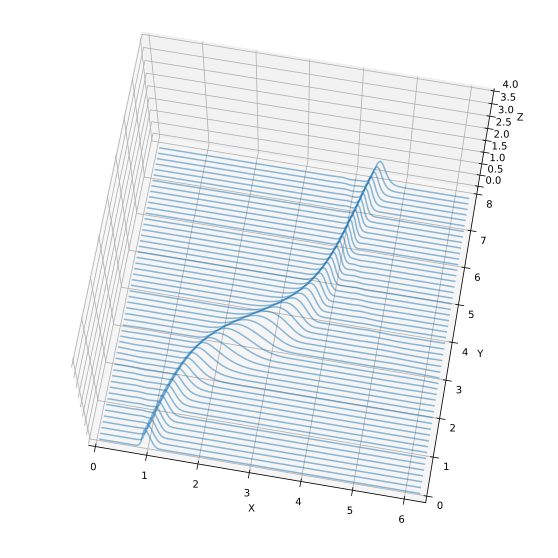

In [4]:
# Set up grid and differentiation matrix:
N = 128; h = 2*pi/N; x = h*arange(1,N+1);
t = 0.0; dt = h/4.0
c = 0.2 + sin(x-1.0)**2.0
v = exp(-100.0*(x-1.0)**2.0); vold = exp(-100.0*(x-0.2*dt-1.0)**2.0);

# Time-stepping by leap-frog formula
tmax = 8.0; tplot = 0.15;
plotgap = int(round(tplot/dt)); dt = tplot/plotgap;
nplots = int(round(tmax/tplot))
data = []
data.append(list(zip(x, v)))
tdata = []; tdata.append(0.0)
for i in range(1,nplots):
    for n in range(plotgap):
        t = t + dt
        v_hat = fft(v)
        w_hat = 1j*zeros(N)
        w_hat[0:N//2] = 1j*arange(0,N//2)
        w_hat[N//2+1:] = 1j*arange(-N//2+1,0,1)
        w_hat = w_hat * v_hat
        w = real(ifft(w_hat))
        vnew = vold - 2.0*dt*c*w
        vold = v; v = vnew;
    data.append(list(zip(x, v)))
    tdata.append(t);

fig = figure(figsize=(12,10))
ax = fig.add_subplot(111,projection='3d')
poly = LineCollection(data)
poly.set_alpha(0.5)
ax.add_collection3d(poly, zs=tdata, zdir='y')
ax.set_xlabel('X')
ax.set_xlim3d(0, 2*pi)
ax.set_ylabel('Y')
ax.set_ylim3d(0, 8)
ax.set_zlabel('Z')
ax.set_zlim3d(0, 4)
ax.view_init(70,-80)